In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
actual_path = os.getcwd()
os.chdir('/home/onyxia/work/Dynamical_system/data')
data_2019 = pd.read_csv('data_2019.csv',sep=';')
data_2020 = pd.read_csv('data_2020.csv',sep=';')
data_2021 = pd.read_csv('data_2021.csv',sep=';')
data_2022 = pd.read_csv('data_2022.csv',sep=';')
prices = pd.read_csv('France.csv')
os.chdir(actual_path)

/tmp/ipykernel_2221/128724526.py:5: DtypeWarning: Columns (36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('data_2021.csv',sep=';')


In [3]:
whole_data = pd.concat([data_2019,data_2020,data_2021,data_2022])

In [4]:
whole_data = whole_data.reset_index(drop=True)

In [5]:
list_to_drop = ['Périmètre','Prévision J-1','Prévision J',
                ' Stockage batterie',
                'Déstockage batterie','Eolien terrestre',
                'Eolien offshore',
                'Unnamed: 40','Nature',
               'Ech. comm. Angleterre',
               'Ech. comm. Espagne',
               'Ech. comm. Italie', 'Ech. comm. Suisse',
                'Ech. comm. Allemagne-Belgique']

In [6]:
use_data = whole_data.drop(list_to_drop,axis=1).copy()

In [7]:
use_data = use_data.dropna()

In [8]:
use_data.loc[:, 'Heures'] = use_data['Heures'].apply(lambda x: f"{x}:00" if len(x.split(':')) == 2 else x)
use_data['Heures'] = pd.to_timedelta(use_data['Heures'])

In [9]:
use_data['date'] = pd.to_datetime(use_data['Date']) + use_data['Heures']

In [10]:
use_data.drop(['Date','Heures'],axis=1,inplace=True)

In [19]:
prices_period = prices[prices['Datetime (Local)'] > '2019-01-01 00:00:00'].copy()

In [20]:
prices_period

,Country,ISO3 Code,Datetime (UTC),Datetime (Local),Price (EUR/MWhe)
35064,France,FRA,2019-01-01 00:00:00,2019-01-01 01:00:00,46.27
35065,France,FRA,2019-01-01 01:00:00,2019-01-01 02:00:00,39.78
35066,France,FRA,2019-01-01 02:00:00,2019-01-01 03:00:00,27.87
35067,France,FRA,2019-01-01 03:00:00,2019-01-01 04:00:00,23.21
35068,France,FRA,2019-01-01 04:00:00,2019-01-01 05:00:00,22.64
...,...,...,...,...,...
87617,France,FRA,2024-12-29 17:00:00,2024-12-29 18:00:00,134.40
87618,France,FRA,2024-12-29 18:00:00,2024-12-29 19:00:00,133.72
87619,France,FRA,2024-12-29 19:00:00,2024-12-29 20:00:00,123.92
87620,France,FRA,2024-12-29 20:00:00,2024-12-29 21:00:00,118.59


In [22]:
prices_period.drop(['Country','ISO3 Code','Datetime (UTC)'],axis=1,inplace=True)

In [26]:
whole_period = prices_period.merge(use_data,how='left',left_on='Datetime (Local)',
                                  right_on='date')

In [25]:
prices_period['Datetime (Local)'] = pd.to_datetime(prices_period['Datetime (Local)'])

In [31]:
whole_period.drop('Datetime (Local)',axis=1,inplace=True)

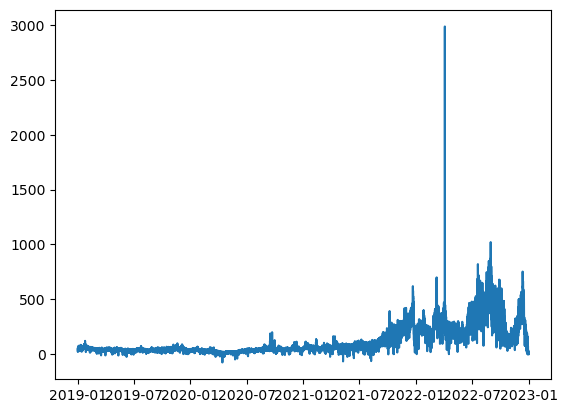

In [30]:
plt.plot(whole_period['date'],whole_period['Price (EUR/MWhe)'])

In [33]:
whole_period.columns

Index(['Price (EUR/MWhe)', 'Consommation', 'Fioul', 'Charbon', 'Gaz',
       'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioénergies', 'Ech. physiques', 'Taux de Co2', 'Fioul - TAC',
       'Fioul - Cogén.', 'Fioul - Autres', 'Gaz - TAC', 'Gaz - Cogén.',
       'Gaz - CCG', 'Gaz - Autres', 'Hydraulique - Fil de l?eau + éclusée',
       'Hydraulique - Lacs', 'Hydraulique - STEP turbinage',
       'Bioénergies - Déchets', 'Bioénergies - Biomasse',
       'Bioénergies - Biogaz', 'date'],
      dtype='object')

In [34]:
whole_period.columns = ['price','conso','fioul','charbon','gaz',
                       'nuclear','wind','sun','hydro','pump','bioenergy','physics',
                       'co2_rate','fioul_tac','fioul_cogen','fioul_other','gas_tac',
                       'gas_cogen','gas_ccg','gas_other','hydro_river','hydro_lake',
                       'hydro_turbine','bio_waste','bio_biomass','bio_biogas','date']

In [37]:
whole_period.dropna(inplace=True)

In [38]:
whole_period

,price,conso,fioul,charbon,gaz,nuclear,wind,sun,hydro,pump,...,gas_cogen,gas_ccg,gas_other,hydro_river,hydro_lake,hydro_turbine,bio_waste,bio_biomass,bio_biogas,date
0,46.27,60923.0,149.0,12.0,2858.0,55039.0,1691.0,0.0,4261.0,-1507.0,...,2566.0,191.0,98.0,3369.0,765.0,127.0,559.0,310.0,291.0,2019-01-01 01:00:00
1,39.78,60127.0,146.0,13.0,2825.0,54950.0,1649.0,0.0,3913.0,-1745.0,...,2564.0,162.0,94.0,3126.0,787.0,0.0,566.0,312.0,289.0,2019-01-01 02:00:00
2,27.87,57399.0,147.0,13.0,2836.0,54213.0,1601.0,0.0,3302.0,-2710.0,...,2532.0,202.0,98.0,3032.0,270.0,0.0,566.0,306.0,289.0,2019-01-01 03:00:00
3,23.21,54306.0,147.0,12.0,2840.0,52072.0,1660.0,0.0,3131.0,-2794.0,...,2533.0,209.0,94.0,2938.0,193.0,0.0,568.0,307.0,287.0,2019-01-01 04:00:00
4,22.64,52842.0,147.0,12.0,2848.0,49476.0,1702.0,0.0,3003.0,-3031.0,...,2534.0,209.0,101.0,2866.0,137.0,0.0,564.0,308.0,284.0,2019-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35058,18.11,50775.0,76.0,24.0,2532.0,27430.0,16236.0,1.0,7272.0,-1512.0,...,811.0,321.0,1328.0,5677.0,1032.0,563.0,528.0,431.0,340.0,2022-12-31 19:00:00
35059,7.60,49189.0,73.0,23.0,2489.0,26996.0,16330.0,1.0,6723.0,-1118.0,...,821.0,242.0,1353.0,5613.0,833.0,276.0,530.0,430.0,338.0,2022-12-31 20:00:00
35060,3.69,46519.0,74.0,23.0,2507.0,26433.0,16340.0,1.0,6606.0,-2239.0,...,821.0,260.0,1354.0,5381.0,809.0,416.0,528.0,427.0,337.0,2022-12-31 21:00:00
35061,1.88,45083.0,77.0,23.0,2569.0,26374.0,16093.0,1.0,6891.0,-2397.0,...,820.0,315.0,1361.0,5248.0,1366.0,277.0,524.0,427.0,337.0,2022-12-31 22:00:00
